In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import build_markov
reload(build_markov)

<module 'build_markov' from 'build_markov.pyc'>

In [52]:
model = build_markov.dim_red_builder(num_sample_points = 10000,
                                     Regime= "kerr_bistable", 
                                     name = 'kerr_bistable_test',
                                     sample_type = 'first_n',
                                    )

In [53]:
model.run_diffusion_map(eig_upper_bound = 7,eps = 0.5,)  

In [118]:
model.save()

In [55]:
model.load()

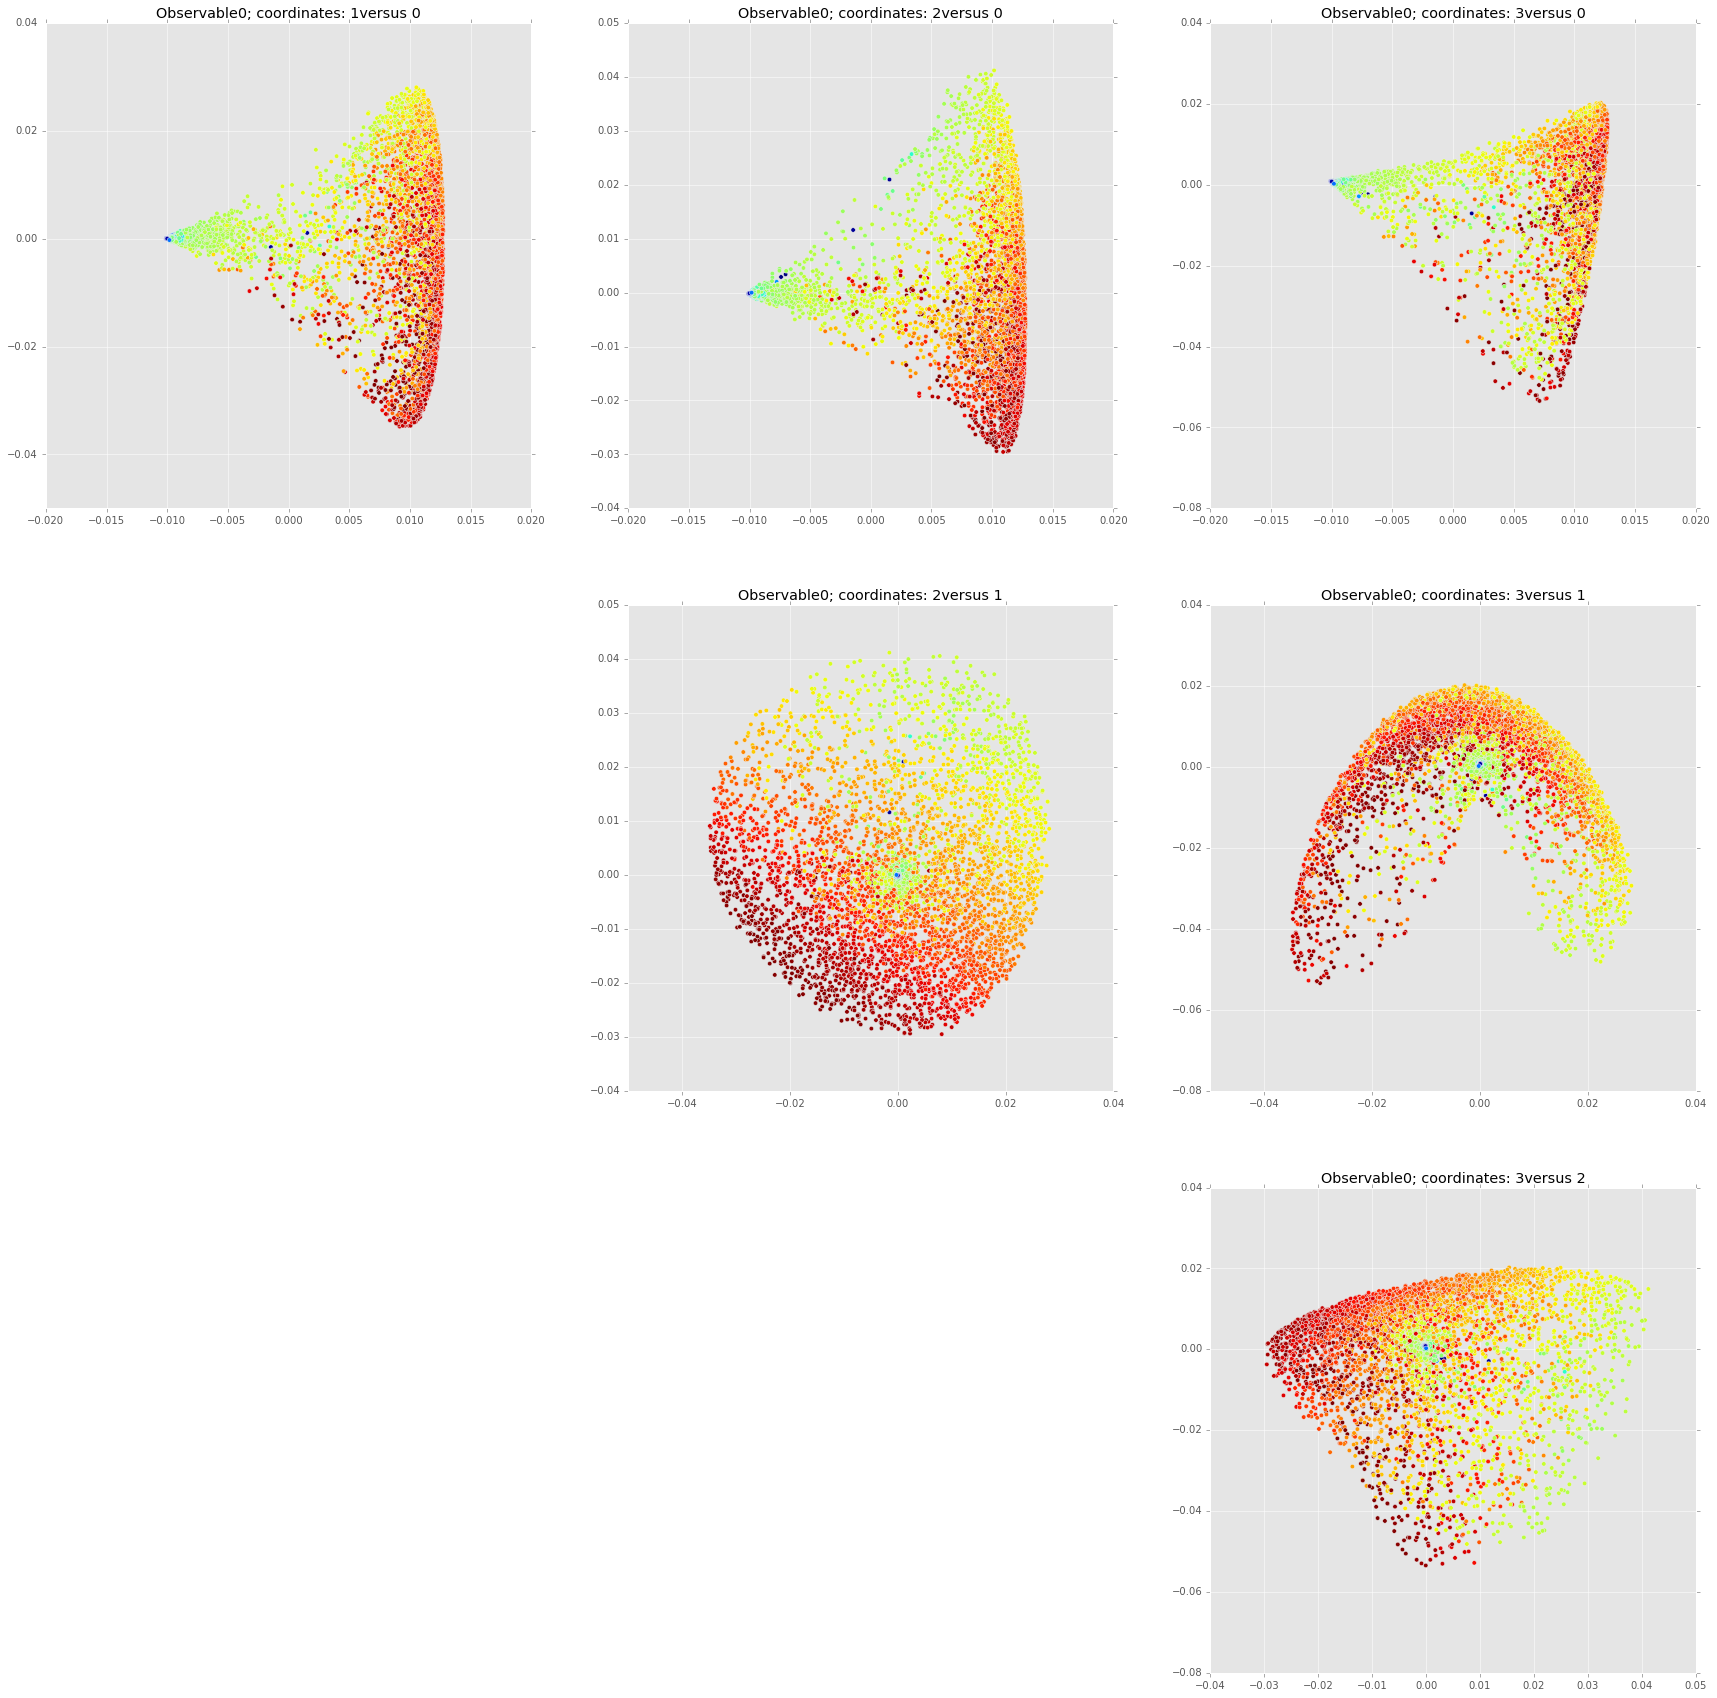

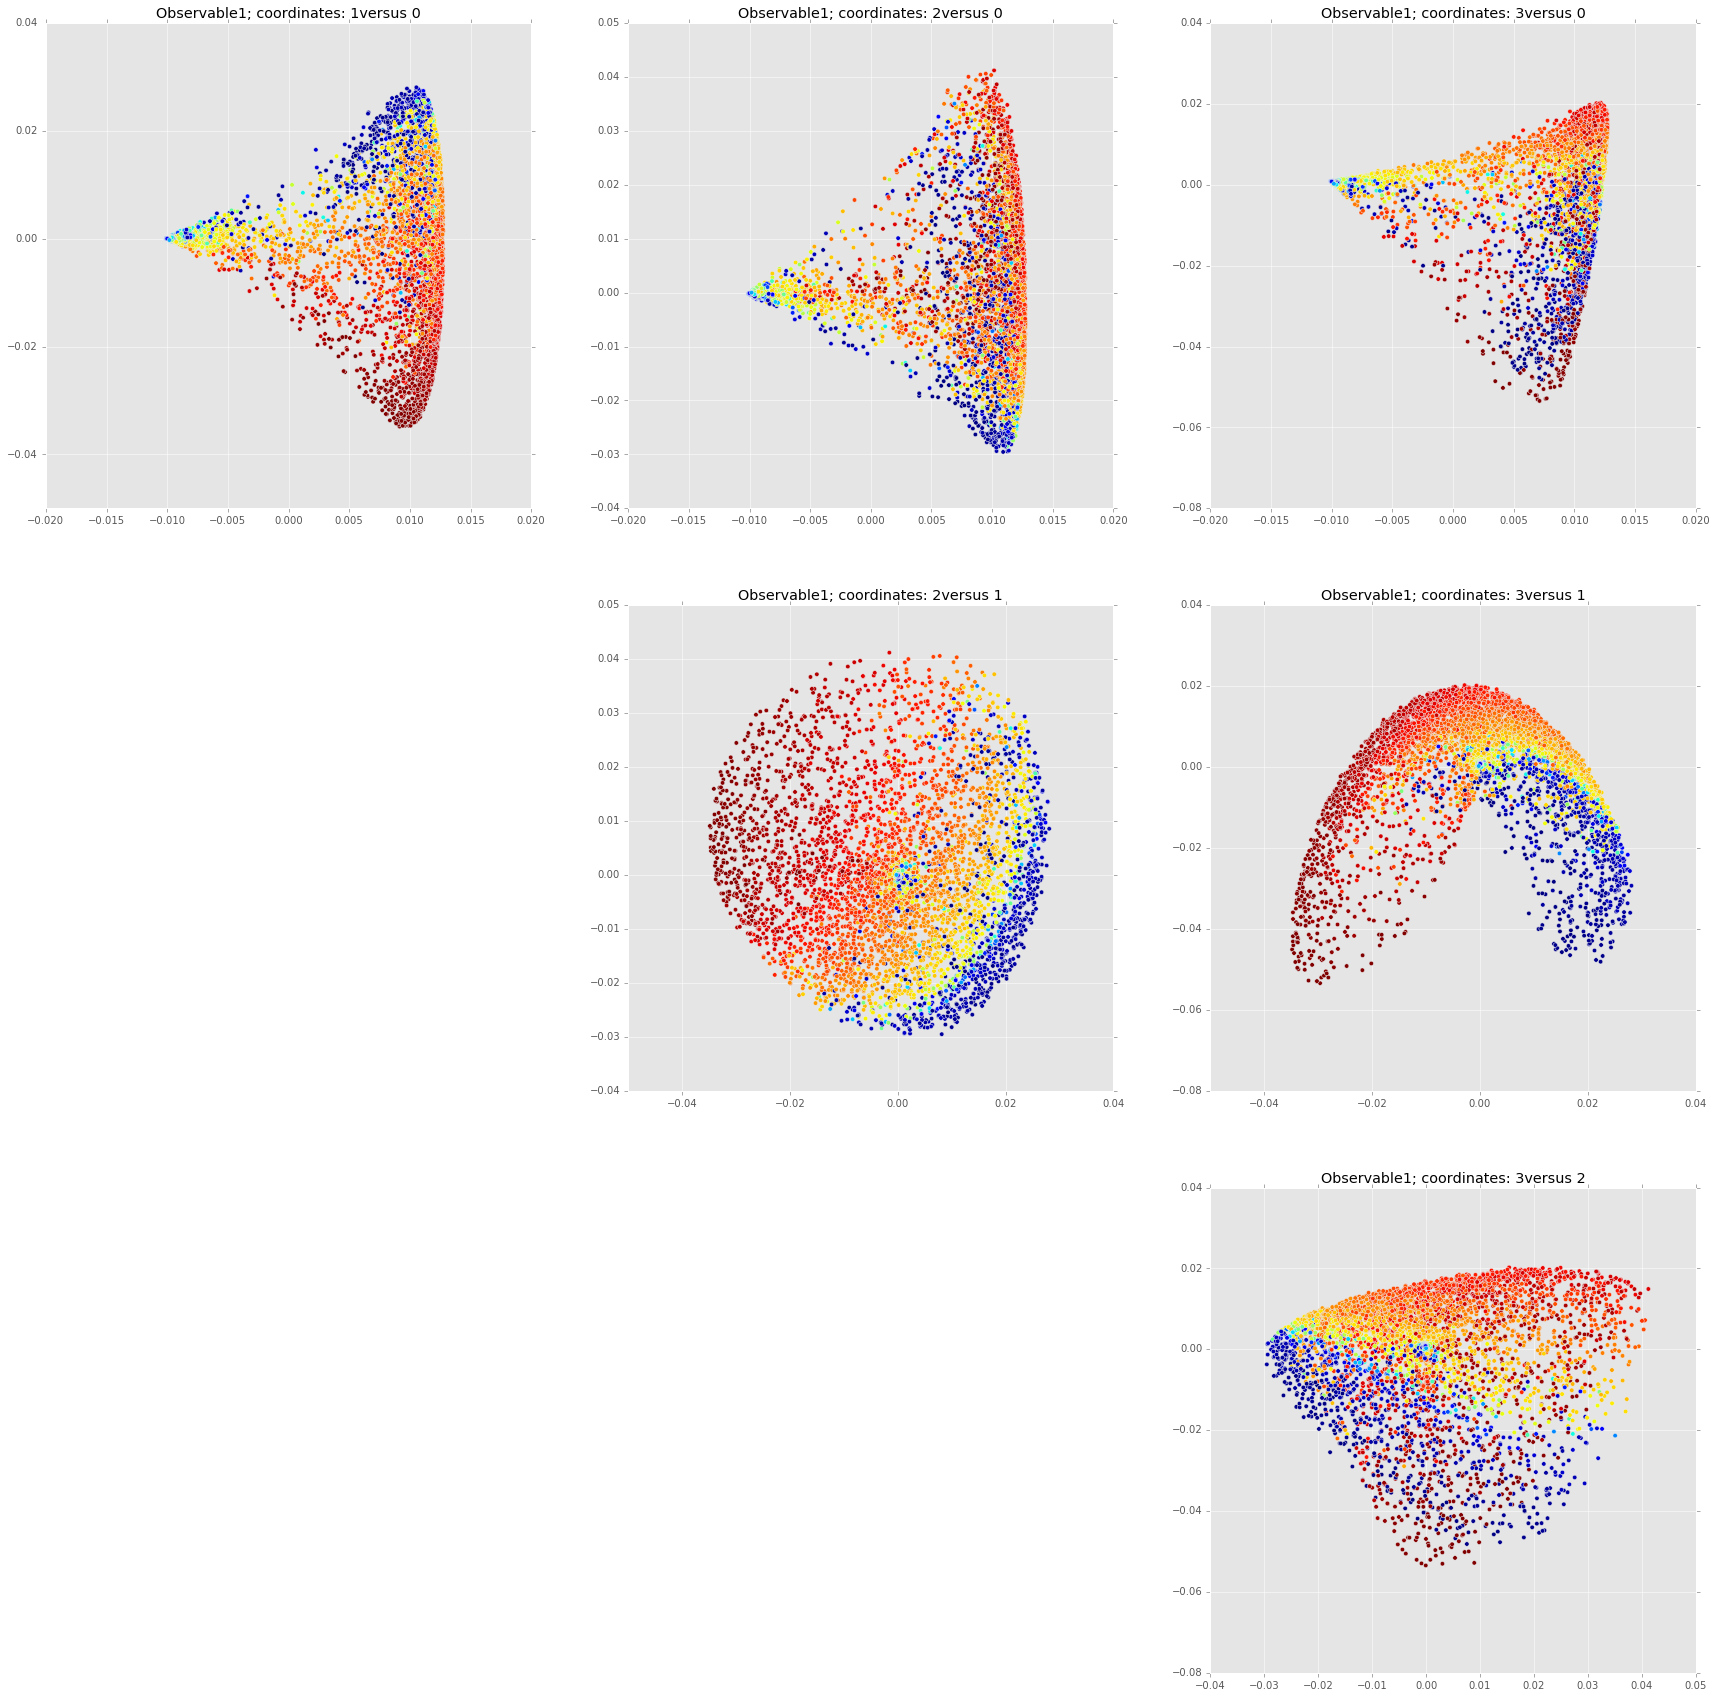

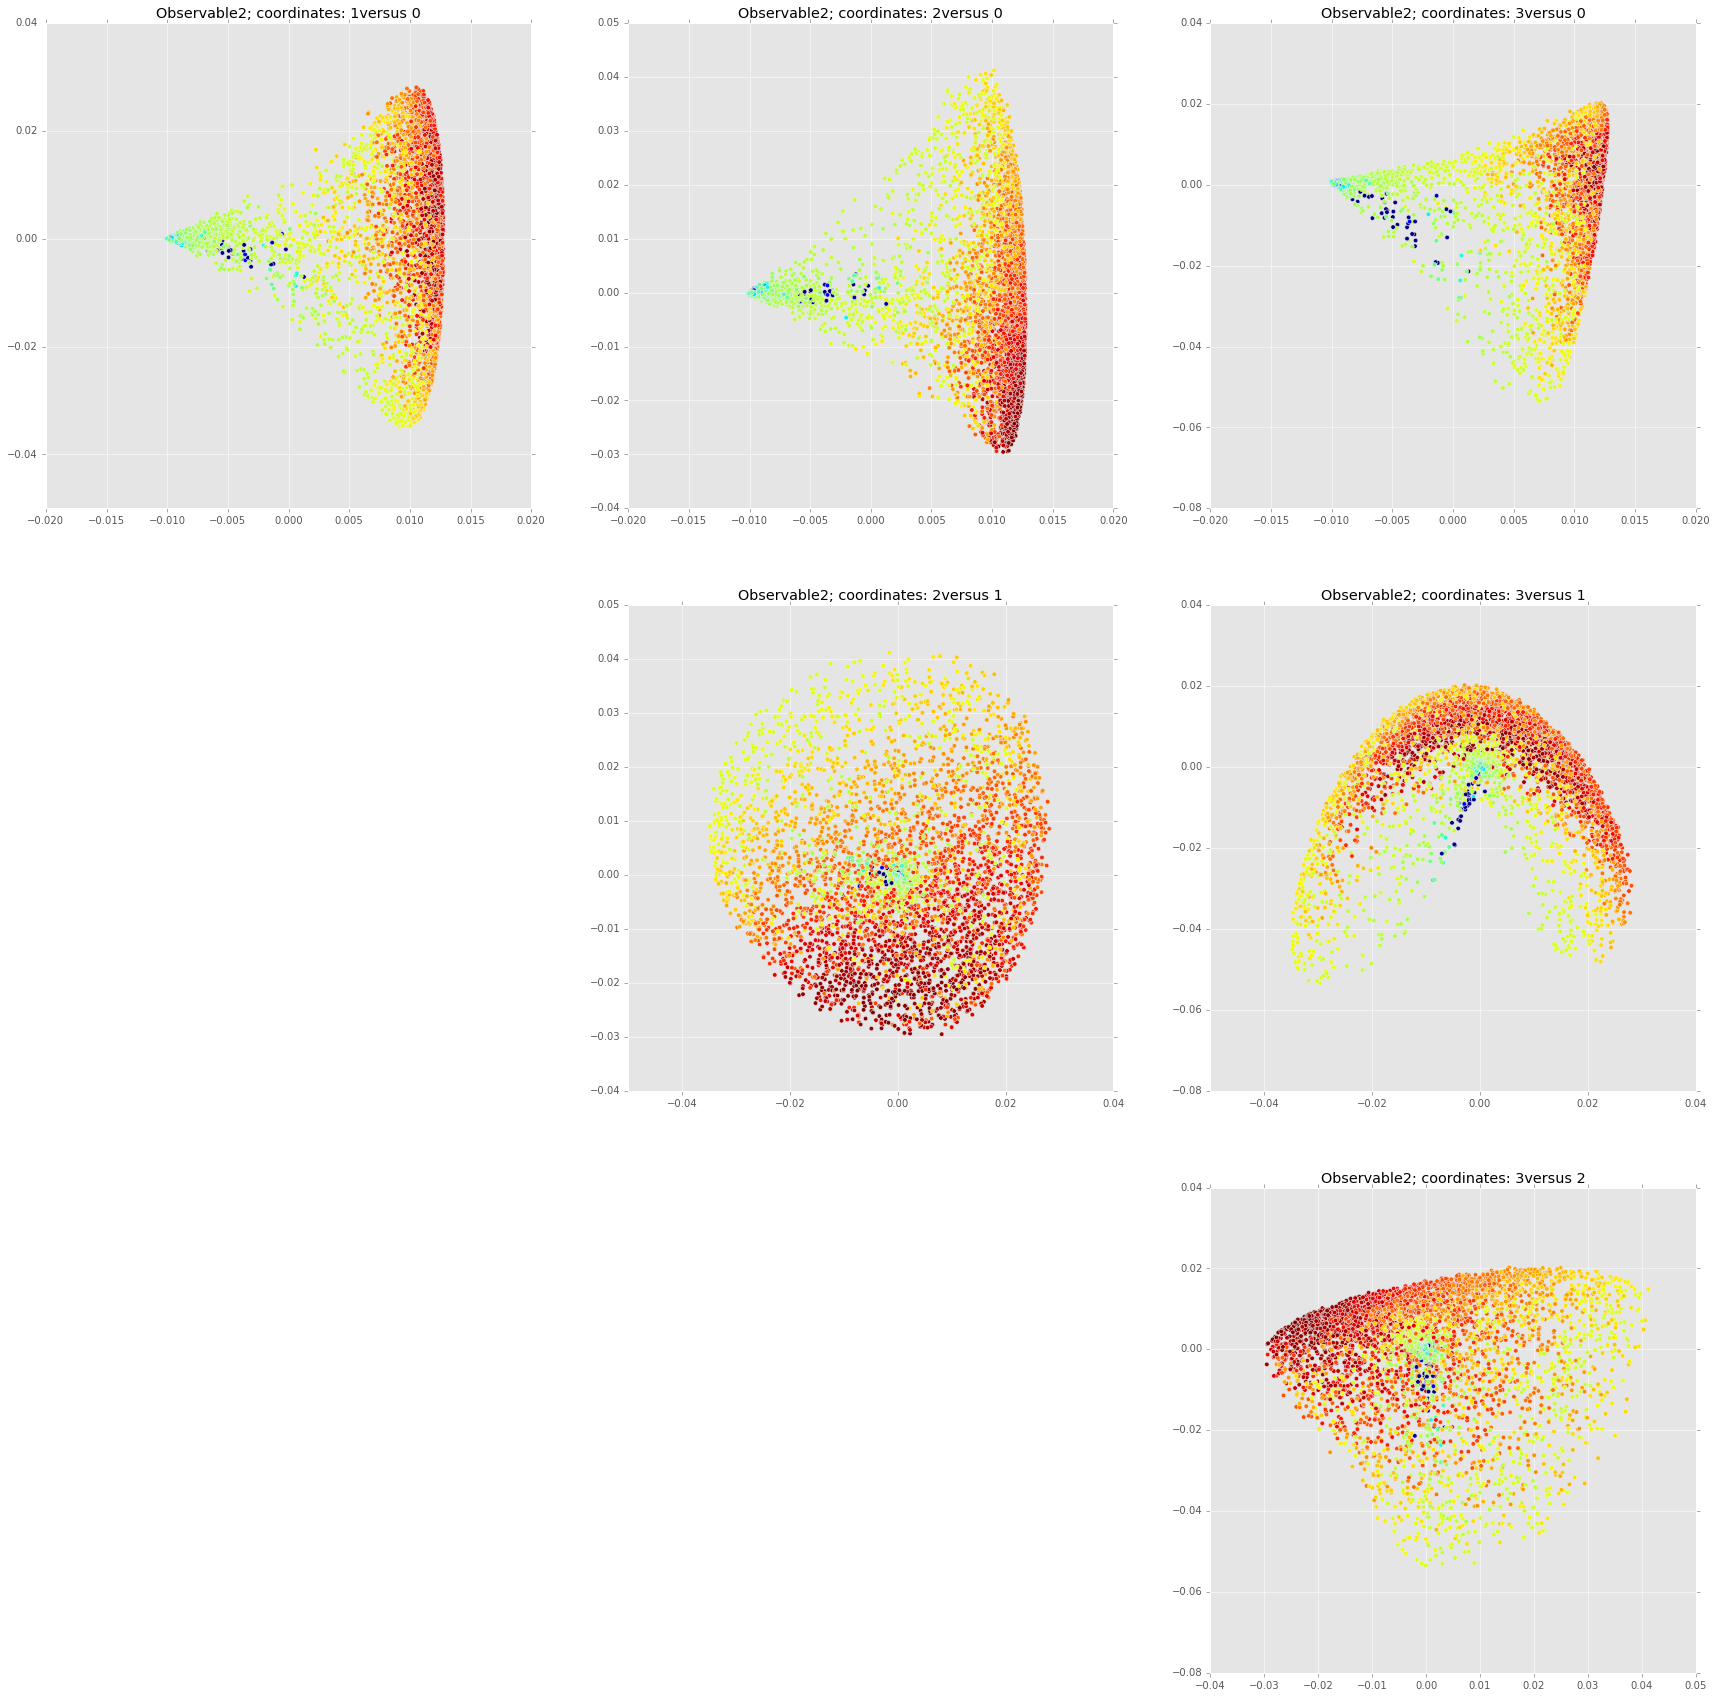

In [56]:
model.plot_diffusion_v_diffusion()

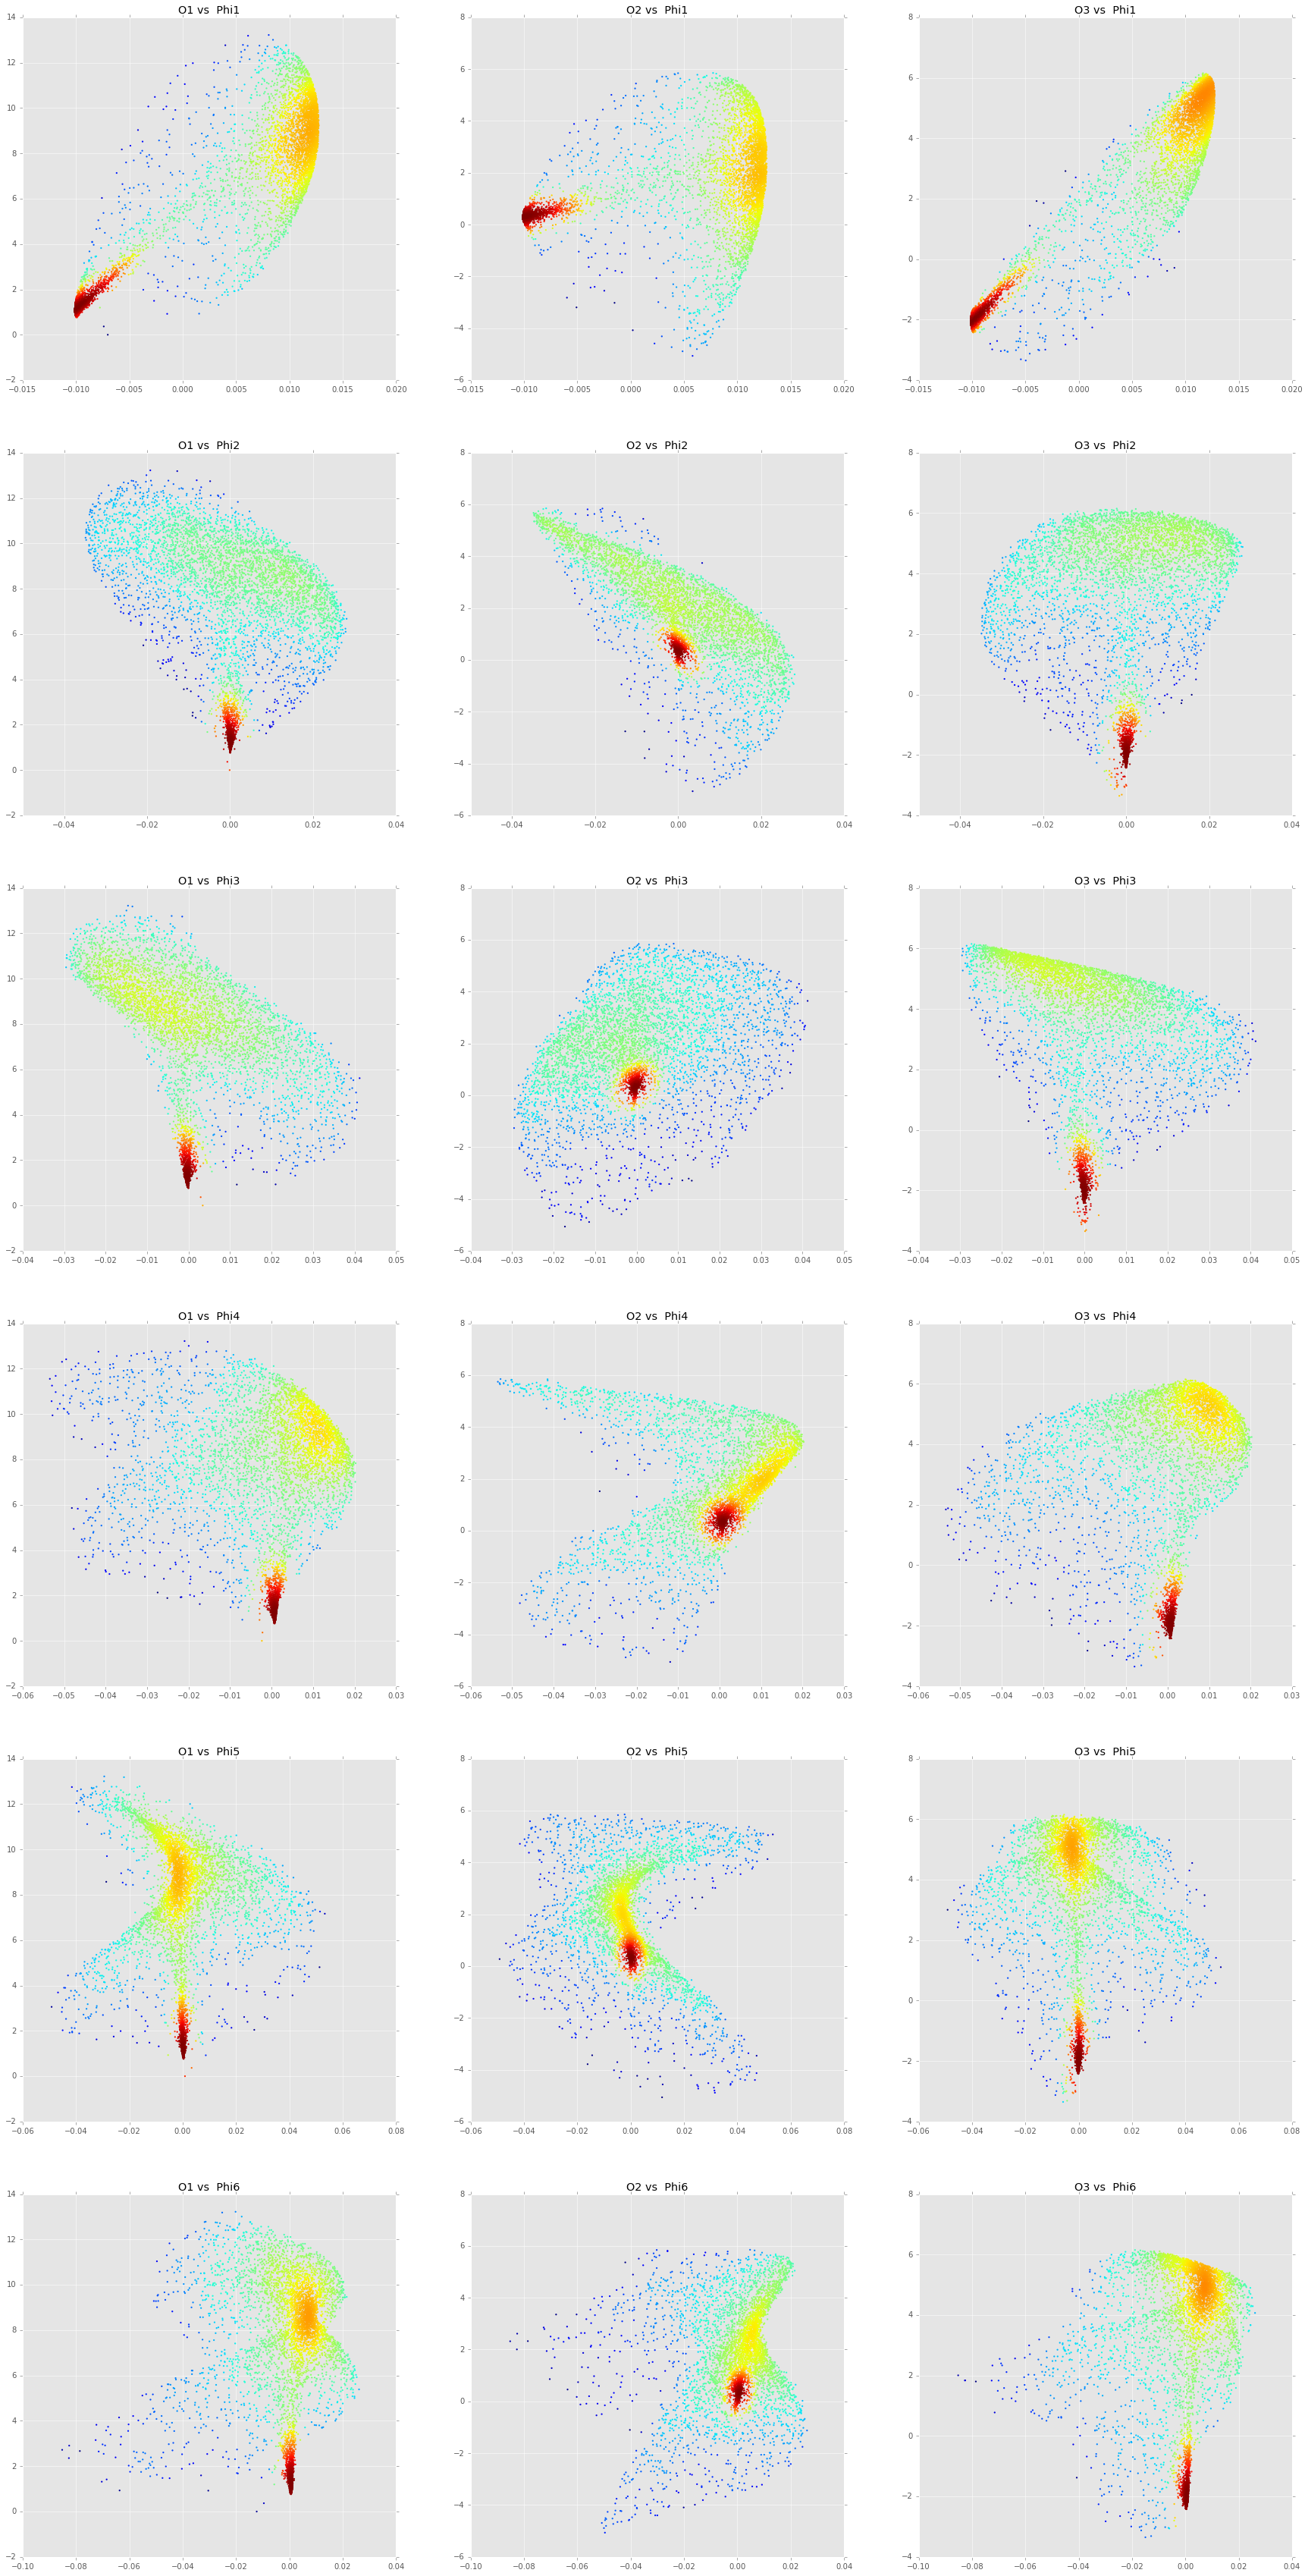

In [57]:
model.plot_obs_v_diffusion()

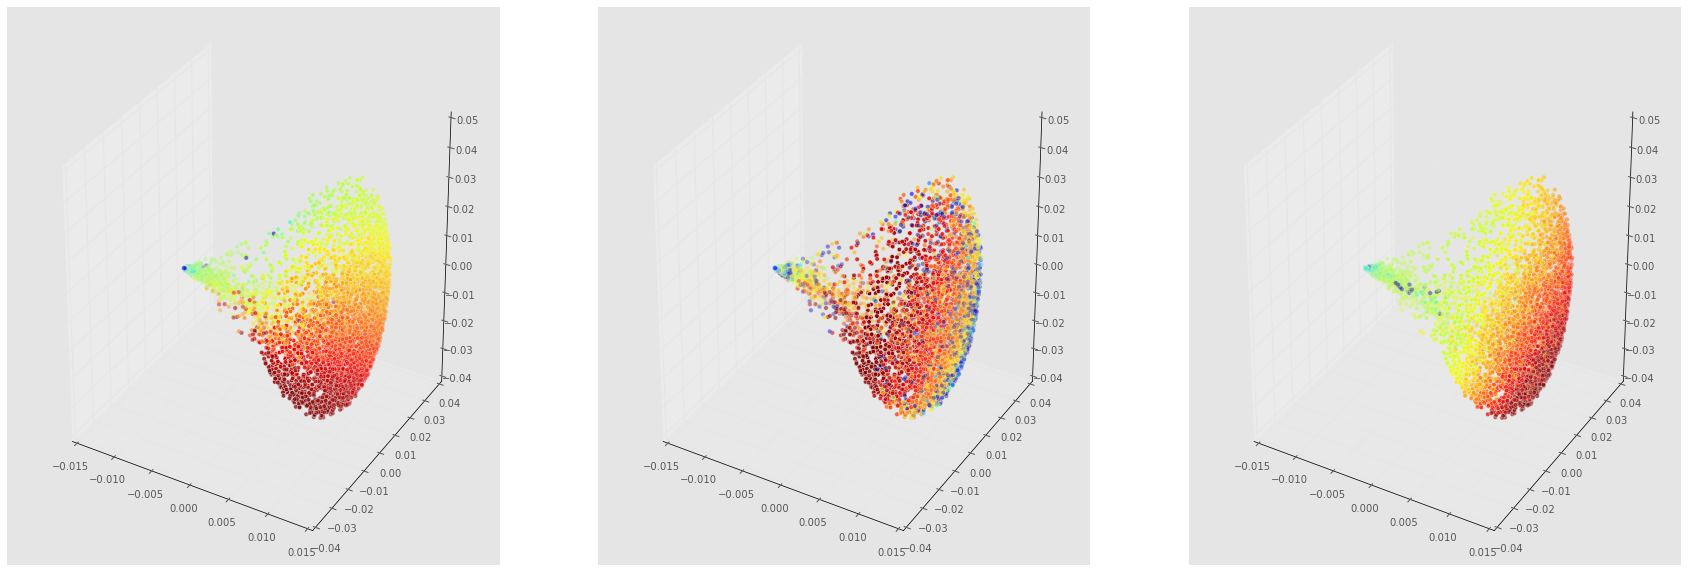

In [58]:
model.plot_diffusion_3d()

In [120]:
builder = build_markov.markov_model_builder(model)

In [130]:
builder.build_model(n_clusters=50,n_iter=100,random_state=1,covariance_type='full',num_diff_coords=6)

converged True


In [131]:
builder.save()

In [132]:
builder.load()

In [133]:
# reload(build_markov)
# builder2 = build_markov.markov_model_builder(model)
# builder2reload(build_markov)
# builder2 = build_markov.markov_model_builder(model).build_model(n_clusters=5,n_iter=1000,tol = 1e-4,random_state=1,covariance_type='full')
# builder2.status

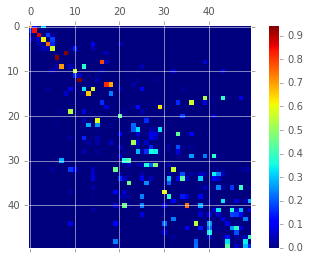

In [134]:
builder.plot_transition_matrix(obs_index = 0)

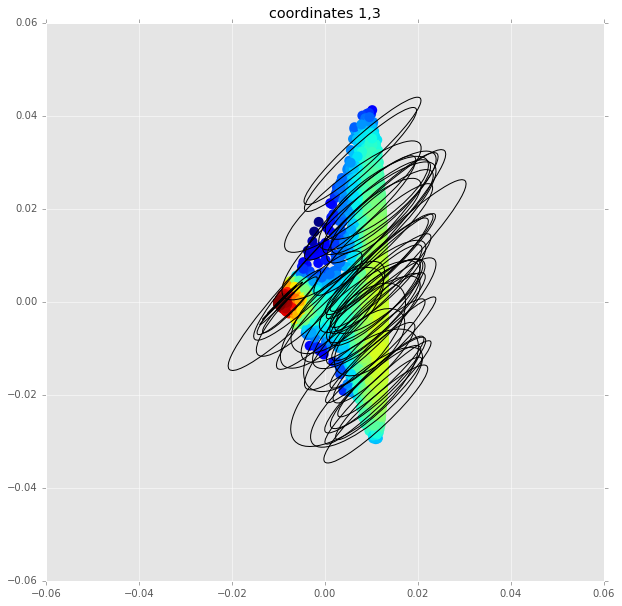

In [135]:
builder.ellipses_plot(indices=[0,2])

In [136]:
# builder.build_model(n_clusters=2000,method='agg_clustering')

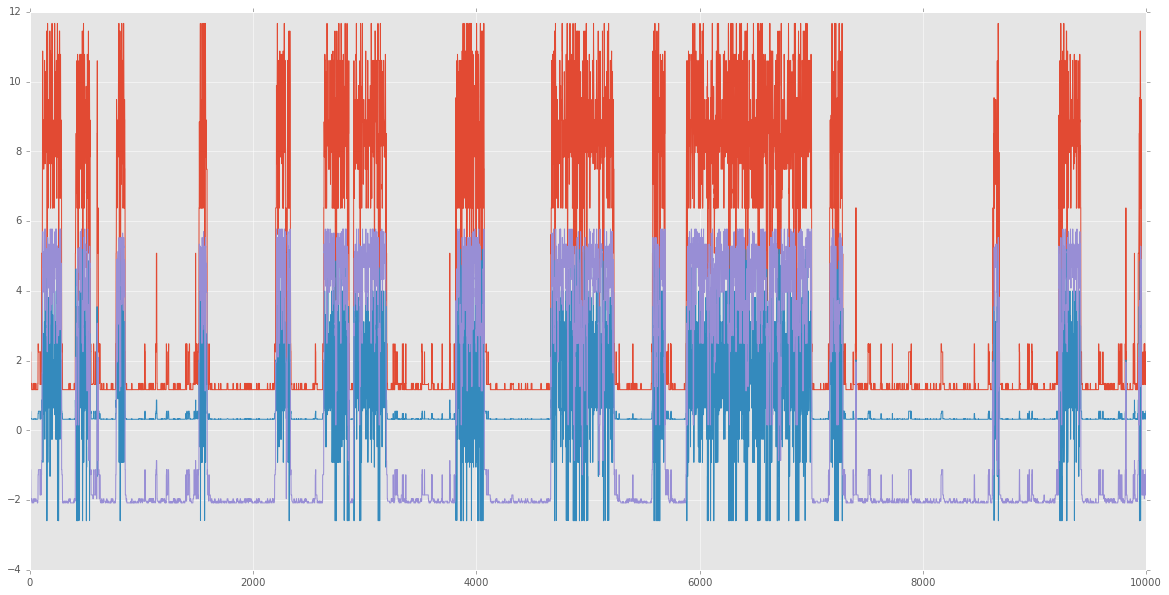

In [137]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(builder.generate_obs_traj(random_state=0)).T);

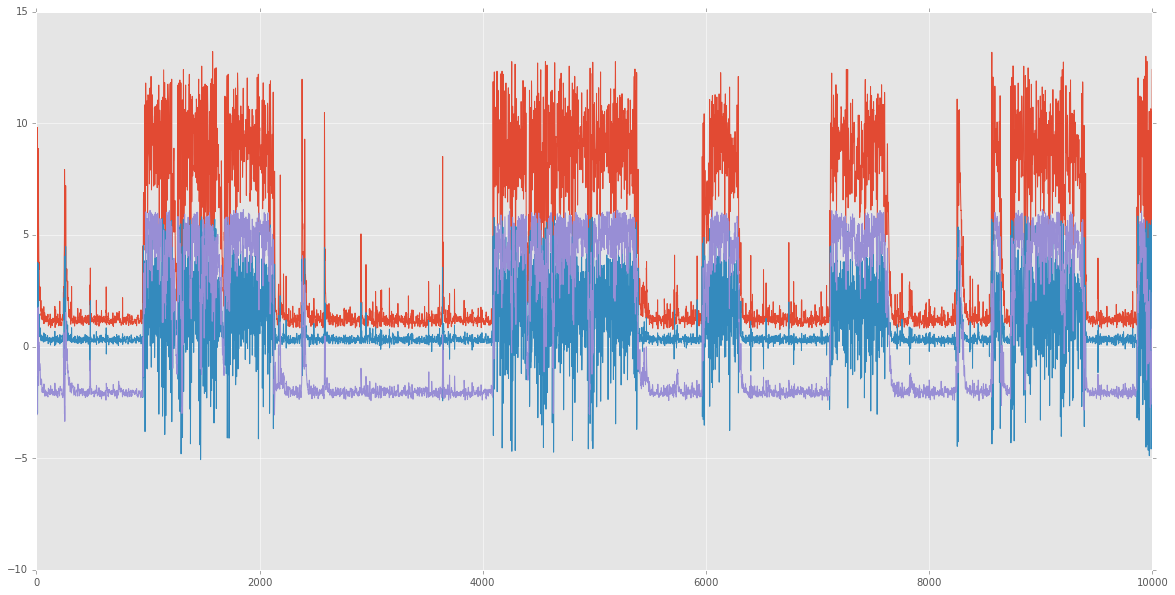

In [138]:
plt.figure(figsize=(20,10))
plt.plot(model.traj_expects.T[:10000]);

### what observables look like...

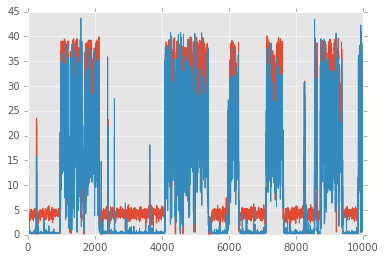

In [117]:
## X*2+P^2
plt.plot(abs(model.traj_expects[1].T[:10000])**2 + abs(model.traj_expects[2].T[:10000])**2)

## N^2 ~ (X^2 + P^2)/4
plt.plot(abs(model.traj_expects[0].T[:10000])**2/4.)

## Notes:

agg_clustering seems to work well for large cluster values (more than 100 or so). 
hmm works for small cluster numbers (and is too slow for large cluster numbers),
but not for all trajectories. Those starting at time 0 seem to work well,
but those starting later do no seem to get the right values.
hmm seems to fail for too few diffusion coordinates. 6 seems to work well, but it almost never works for 3 or 4.

All the above seem to hold for the other example in build_markov_absorptive.